# Test evaluation
Note: This document's purpose is to communicate information via text and charts. The code in here is only for charting; the more complex logic is hidden in Python modules to be found in the same repository.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import evaluate
import merge
import load

In [2]:
# Load merged prediction
columns = ['returnQuantity', 'articleID', 'productGroup', 'customerID', 'voucherID']
predictions = merge.merged_predictions(test=True, keep_columns=columns)

# Take the complement of the (30%) predictions to obtain the training data used.
train = evaluate.test_complement(predictions)

Note: You can find the structure of the merged data in the appendix.

## How well do the teams perform?
To be able to compare team performances we agreed on a common test set. We generated split the original training data into 70% training and 30% test rows. Together with the actual submission, each team handed in their prediction for the test set.

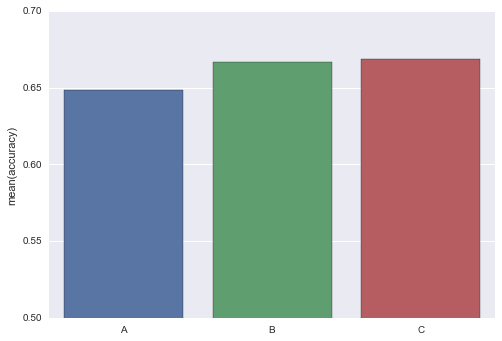

In [3]:
# Calculate mean accuracies
mean_accuracies = evaluate.mean_accuracies(predictions)

# Barplot
ax = sns.barplot(x=mean_accuracies.index, y=mean_accuracies['accuracy'])
lim = ax.set_ylim([0.5, 0.7])

All teams show similar accuracies around 66.3% on the test set.

## How do the performences differ per split?
All teams found that their classifiers performance better using historical knowledge. E.g., a strong featured proved to be the number of products returned by a customer. As such such featues dominated others, classifiers would perform better overall, but weaker on records with unknown values. To counteract, teams divided their classification into *splits* of known and unknown values and trained seperate classifiers.

The figure below shows the team performances seperated into splits.

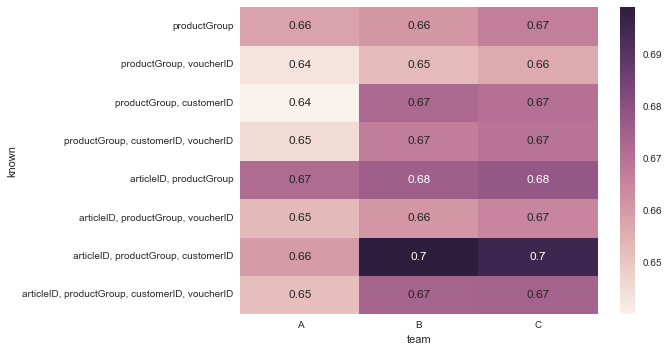

In [4]:
# Calculate accuracy for each team per split
split_accuracies = evaluate.evaluate_split_performance(train, predictions)

# Heatmap, remove splits not contained in test data
ax = sns.heatmap(split_accuracies.ix[4:,], annot=True)

The split performances reflect the overall performance. There are not outliers in teams across splits and in splits across teams. This complicates merge approaches based on splits, as there is no strong *winner*. It seems that knowledge about values in *articleID* and *customerID* positively affects performance.

You can find the relative size of each split in the test data in the figure below.

(The known splits *nothing known*, *only voucherID*, *only customerID* and *customerID and voucherID* do appear in the target data, but not this test set. They are left out in the heatmap.)

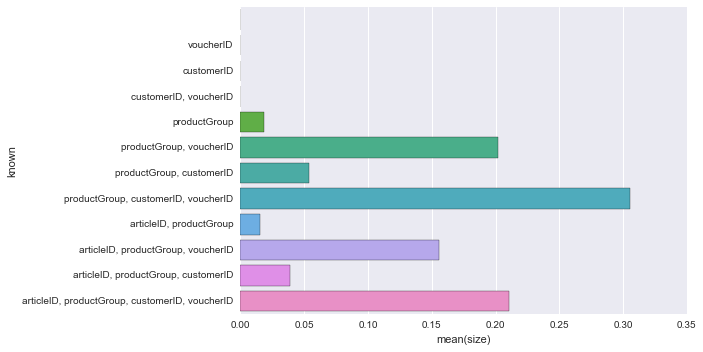

In [5]:
# Calculate size of each split
split_sizes = evaluate.split_sizes(train, predictions['original'])

# Barplot
ax = sns.barplot(x='size', y=split_sizes.index, data=split_sizes)

## To what extent do the predictions differ?

The figure below shows a comparison for each combination of teams. The cells containt the percentage of rows that have different classifications.

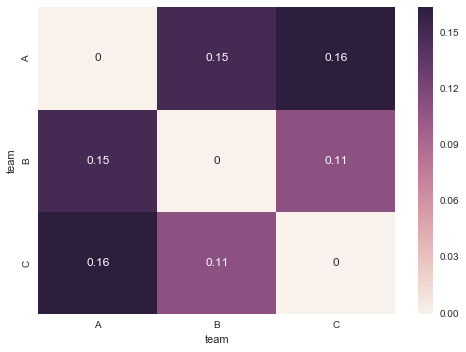

In [6]:
# Calculate difference for each combination
differences = evaluate.distinct_predictions(predictions)

# Heatmap
ax = sns.heatmap(differences, annot=True)

The differences reflect overall performance.

## How do the predictions differ per split?
The figure below helps explore these differences. It shows the differences for each combination of teams (columns) seperated into splits (rows). Again, the cells contain the percentage of different rows.

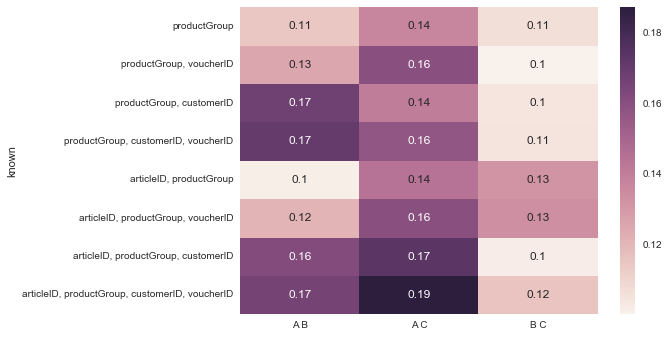

In [7]:
# Calculate difference for each combination across splits
split_differences = evaluate.distinct_split_predictions(train, predictions)

# Heatmap
ax = sns.heatmap(split_differences.ix[4:], annot=True)

Again, the differences reflect the overall performance. It seems that B and C argue when only information about the *articleID* is given (which strongly correlates with information on *productGroup*). A seems to argue with B and C when knowledge on *customerID* is given.

## How are the confidences distributed?
The figure below shows the confidence distributions for each team. The confidences show similar central tendency but have different ranges. This shows that confidences are hardly comparable between teams, complicating merge approaches based on confidence.

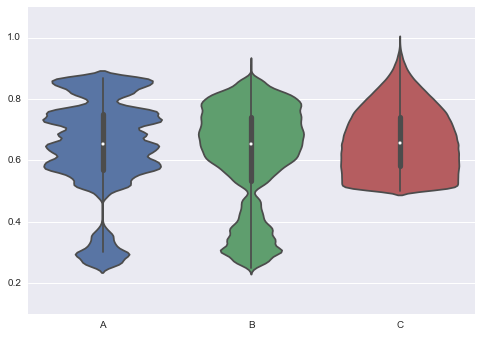

In [8]:
# Violinplot
ax = sns.violinplot(data=predictions['confidence'])

## How confident are the classifiers across splits?
The figure below shows the mean confidence of each classifier seperated by splits.

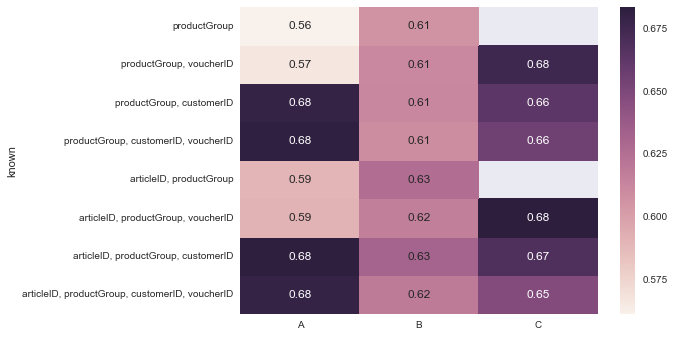

In [9]:
# Calculate the mean confidence across splits for each team
confidences = evaluate.split_mean_confidences(train, predictions)

# Heatmap
ax = sns.heatmap(confidences.ix[4:], annot=True)

(C used different classifiers, not all of them providing confidences; the respective cells are grey.)

B and C show consistency in their confidence. A's confidence seems to go along with knowledge on *customerID*, although it had the greatest differences in the same splits.

## Appendix
### Prediction data

In [10]:
predictions

confidence                      \
                                               A         B         C   
orderID  articleID colorCode sizeCode                                  
a1527394 i1000674  1079      44         0.805011  0.390518  0.651473   
         i1001047  1077      44         0.805011  0.670208  0.522485   
         i1001075  1003      44         0.817212  0.747266  0.619395   
         i1001264  2012      44         0.817212  0.737423  0.584410   
         i1001278  1066      44         0.817212  0.739904  0.641609   
         i1001287  1026      44         0.817212  0.749332  0.792416   
         i1001289  1028      44         0.817212  0.749664  0.726177   
         i1001295  1066      44         0.805011  0.401564  0.566653   
         i1001309  3058      44         0.817212  0.744965  0.703652   
                   3065      44         0.817212  0.744965  0.677778   
         i1001334  2055      44         0.817212  0.747926  0.678172   
         i1001335  3065      44         0.817212  0.748143  0.591232   
a1527395 i1000447  1018      44         0.806947  0.380308  0.540000   
a1527396 i1000667  1088      38         0.302090  0.526361  0.519144   
         i1000727  1493      38         0.302090  0.268191  0.519480   
         i1001074  1065      40         0.333292  0.622346  0.621363   
         i1001130  1001      38         0.559922  0.305500  0.530435   
a1527397 i1001037  1058      36         0.582762  0.622380  0.550000   
         i1001588  1001      36         0.582762  0.645391  0.680000   
a1527398 i1001045  1058      42         0.711955  0.681520  0.680000   
         i1001131  1033      42         0.711955  0.634886  0.530000   
         i1001278  1066      40         0.711955  0.646588  0.580000   
         i1001328  1894      42         0.711955  0.645661  0.670000   
         i1001337  1854      42         0.711955  0.665351  0.720000   
         i1001882  1493      40         0.711955  0.809683  0.660000   
                   1854      42         0.711955  0.809683  0.720000   
         i1001891  2854      42         0.611101  0.671173  0.720000   
a1527399 i1000501  1033      44         0.806947  0.423825  0.570000   
         i1000674  1001      44         0.805011  0.390975  0.640000   
a1527400 i1001050  3076      36         0.517268  0.269187  0.564275   
...                                          ...       ...       ...   
a1744170 i1001450  2001      44         0.627954  0.640207  0.620000   
         i1002555  3086      I          0.295141  0.510441  0.510000   
         i1003147  1001      44         0.486595  0.565549  0.530000   
         i1003211  1493      44         0.602534  0.615422  0.590000   
a1744171 i1001450  2001      44         0.658788  0.684081  0.730462   
         i1001569  1934      44         0.683694  0.718768  0.821122   
         i1001728  1001      44         0.652396  0.704982  0.746601   
         i1001742  1111      44         0.620307  0.684239  0.725527   
         i1003237  1092      44         0.620307  0.641894  0.637975   
         i1003276  1001      44         0.624345  0.682504  0.647301   
         i1003596  7166      34         0.662966  0.707865  0.742257   
         i1003618  7083      34         0.662966  0.707865  0.686512   
a1744172 i1000477  1092      36         0.847281  0.813202  0.600000   
         i1001081  1003      36         0.863980  0.811860  0.660000   
         i1001082  1033      34         0.863980  0.811860  0.640000   
         i1001092  1033      34         0.863980  0.812677  0.700000   
         i1003134  1493      36         0.863980  0.813202  0.710000   
         i1003262  1001      36         0.863980  0.813582  0.620000   
a1744173 i1001562  1096      38         0.541044  0.305500  0.526600   
         i1003234  1082      38         0.541806  0.572965  0.501245   
a1744174 i1001730  2493      42         0.563443  0.614984  0.652092   
         i1003916  3001      42         0.717070  0.765111  0.771272   
      